In [1]:
import dask.bag as db
import dask
from dask.diagnostics import ProgressBar

In [2]:
import xarray as xr
import fsspec
import glob
xr.set_options(display_style='text');

In [3]:
import s3fs
s3 = s3fs.S3FileSystem(anon=False)

In [4]:
references = [f's3://imos-data-pixeldrill/zarrs/{year}/'for year in range(1992, 2000)]
references

['s3://imos-data-pixeldrill/zarrs/1992/',
 's3://imos-data-pixeldrill/zarrs/1993/',
 's3://imos-data-pixeldrill/zarrs/1994/',
 's3://imos-data-pixeldrill/zarrs/1995/',
 's3://imos-data-pixeldrill/zarrs/1996/',
 's3://imos-data-pixeldrill/zarrs/1997/',
 's3://imos-data-pixeldrill/zarrs/1998/',
 's3://imos-data-pixeldrill/zarrs/1999/']

In [5]:
b = db.from_sequence(references)
zarrs = b.map(xr.open_zarr)

In [6]:
%%time
with dask.config.set(scheduler='threads'):
    with ProgressBar():
        zarrs = zarrs.compute()

[########################################] | 100% Completed |  1.4s
CPU times: user 791 ms, sys: 91.7 ms, total: 883 ms
Wall time: 1.36 s


In [7]:
%%time
ds = xr.concat(zarrs,dim='time',coords='minimal',compat='override',combine_attrs='override', fill_value='')

CPU times: user 2.89 s, sys: 270 ms, total: 3.16 s
Wall time: 3.16 s


In [8]:
%%time
timeseries = ds.sel(lat=-20.01,lon=118.6,method='nearest').compute()

CPU times: user 5.1 s, sys: 457 ms, total: 5.56 s
Wall time: 11.6 s


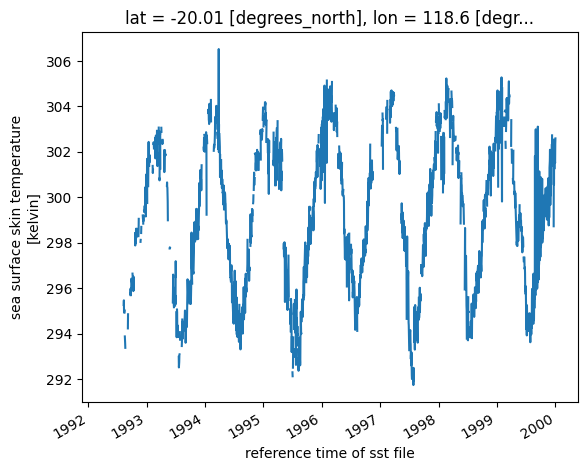

In [9]:
timeseries.sea_surface_temperature.plot()